In [3]:
from math import pi, cos, ceil
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as colors
import sqlite3

In [3]:
with sqlite3.connect('data.db') as conn:
    measures_per_year=pd.read_sql_query('''
    SELECT year, count(distinct id) FROM measures WHERE year<2019 GROUP BY year;
     ''',conn)

In [52]:
measures_per_year.max()

year                   2018
count(distinct id)    41324
dtype: int64

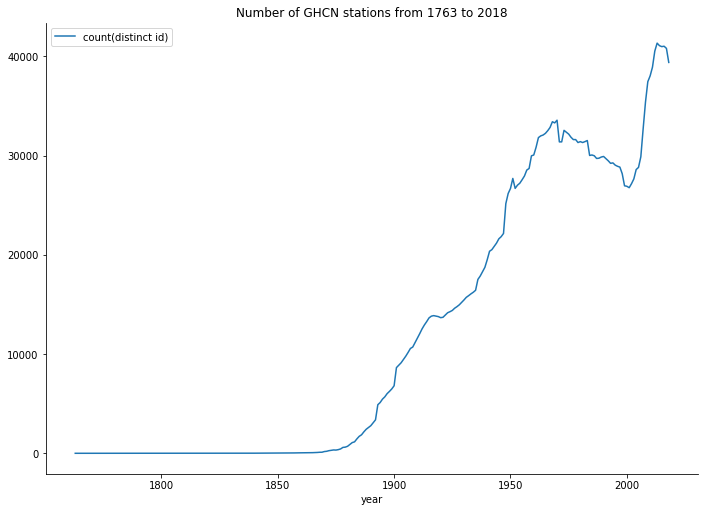

In [5]:
ax=measures_per_year.plot(x='year',y='count(distinct id)',figsize=(11.7,8.3))
ax.set_title('Number of GHCN stations from 1763 to 2018')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [6]:
with sqlite3.connect('data.db') as conn:
    stations=pd.read_sql_query('''
    SELECT * FROM stations;
    ''',conn)

In [14]:
(stations['id'].str[:2].value_counts())/stations.shape[0]

US    0.554492
AS    0.158104
CA    0.080791
BR    0.055412
IN    0.035224
SW    0.015923
SF    0.010788
GM    0.010455
RS    0.010390
FI    0.008531
NO    0.004265
NL    0.003571
KZ    0.003044
WA    0.002618
MX    0.002563
CH    0.002110
RQ    0.001924
SP    0.001915
UP    0.001887
JA    0.001869
UK    0.001462
UY    0.001388
FR    0.001018
VE    0.000990
IT    0.000962
ID    0.000962
GG    0.000953
AY    0.000944
AR    0.000934
AG    0.000805
        ...   
BH    0.000009
BX    0.000009
CK    0.000009
IO    0.000009
UC    0.000009
DO    0.000009
CB    0.000009
CJ    0.000009
CW    0.000009
WI    0.000009
TL    0.000009
WQ    0.000009
EU    0.000009
NS    0.000009
LI    0.000009
GI    0.000009
GA    0.000009
TE    0.000009
JN    0.000009
IZ    0.000009
MF    0.000009
PC    0.000009
BA    0.000009
SN    0.000009
KT    0.000009
SB    0.000009
RE    0.000009
GT    0.000009
JU    0.000009
RW    0.000009
Name: id, Length: 219, dtype: float64

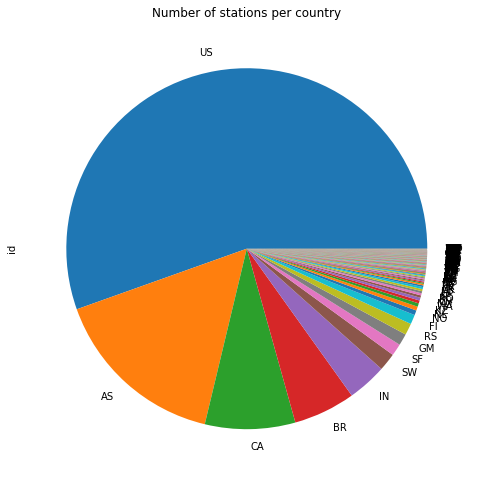

In [13]:
stations['id'].str[:2].value_counts().plot(kind='pie',figsize=(8.3,8.3),title='Number of stations per country')

In [4]:
with sqlite3.connect('data.db') as conn:
    stations_per_sector=pd.read_sql_query('''
    SELECT stations.sector_id,count(stations.sector_id),lat_cen,lon_cen
    FROM measures LEFT JOIN stations ON stations.id = measures.id
    LEFT JOIN sectors ON stations.sector_id = sectors.sector_id
    WHERE year=1918
    GROUP BY stations.sector_id;'''
                               ,conn)


In [40]:
stations_per_sector.max()

sector_id                    203890.000000
count(stations.sector_id)      3169.000000
lat_cen                          82.593516
lon_cen                         179.520000
dtype: float64

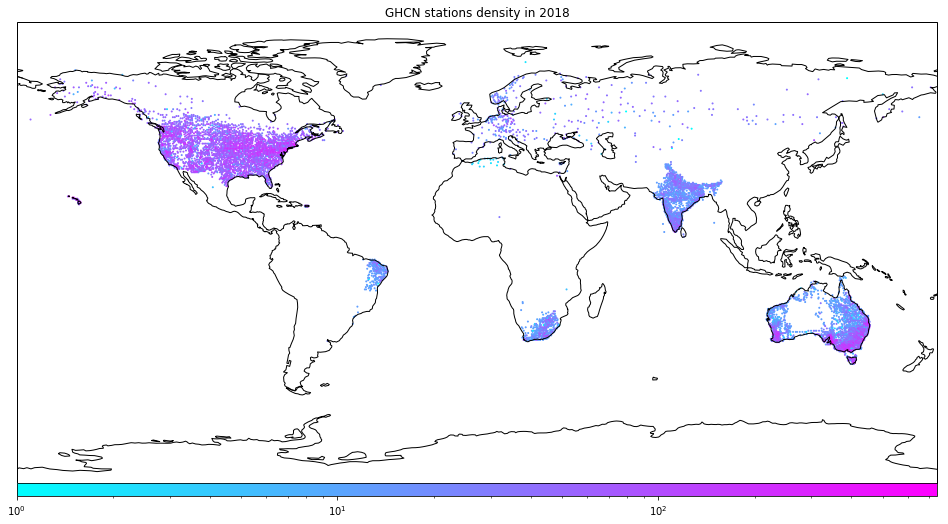

In [5]:
#creating the figure and geoaxes
fig_map=plt.figure(figsize=(16.5,11.7))
ax_map=fig_map.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax_map.coastlines()
ax_map.set_global()
ax_map.set_title('GHCN stations density in 2018')

x=stations_per_sector['lon_cen']
y=stations_per_sector['lat_cen']
c=stations_per_sector['count(stations.sector_id)']

axs=ax_map.scatter(x,y,s=1,c=c,alpha=1,norm=colors.LogNorm(),cmap='cool',transform=ccrs.PlateCarree())
fig_map.colorbar(axs,orientation='horizontal',fraction=0.1,pad=0,aspect=70)

plt.show()

In [19]:
inventory=pd.read_fwf('../climate_data/ghcnd-inventory.txt',names=['id','lat','lon','elt','start','end'])

In [20]:
bool1=inventory['id'].str[:2]=='US'
bool2=inventory['elt']=='PRCP'
bool3=inventory['start']<=1918
bool4=inventory['end']>=2018